In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
from sklearn import tree, neighbors
from sklearn.utils import shuffle
from random import randint
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from collections import OrderedDict

In [2]:
#Headers sets names for all of the attributes contained in the data set
headers = ["id",
           "label",
           "mean_radius",
           "mean_texture",
           "mean_perimeter",
           "mean_area",
           "mean_smoothness",
           "mean_compactness",
           "mean_cancavity",
           "mean_concave_points",
           "mean_symmetry",
           "mean_fractal_dimension",
           "sd_radius",
           "sd_texture",
           "sd_perimeter",
           "sd_area",
           "sd_smoothness",
           "sd_compactness",
           "sd_cancavity",
           "sd_concave_points",
           "sd_symmetry",
           "sd_fractal_dimension",
           "max_radius",
           "max_texture",
           "max_perimeter",
           "max_area",
           "max_smoothness",
           "max_compactness",
           "max_cancavity",
           "max_concave_points",
           "max_symmetry",
           "max_fractal_dimension"]
                
#Data is read into test/train pandas dataframes while being shuffled using a seed of 4 (because I like 4)
test_data = shuffle(pd.read_csv("wdbc-test.csv", names = headers, index_col=0), random_state=4)
train_data = shuffle(pd.read_csv("wdbc-train.csv", names = headers, index_col=0), random_state=4)



Not needed anymore! Thanks sklearn!

def binarize(val):
    if val == 'B':
        return 0
    else:
        return 1

test_data['label'] = test_data['label'].map(binarize)
train_data['label'] = train_data['label'].map(binarize)

In [3]:
test_data

,label,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_cancavity,mean_concave_points,mean_symmetry,...,max_radius,max_texture,max_perimeter,max_area,max_smoothness,max_compactness,max_cancavity,max_concave_points,max_symmetry,max_fractal_dimension
id,,,,,,,,,,,,,,,,,,,,,
9111805,M,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.165500,0.090630,0.1663,...,21.440,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091
915691,M,13.400,20.52,88.64,556.7,0.11060,0.14690,0.144500,0.081720,0.2116,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
911320502,B,13.170,18.22,84.28,537.3,0.07466,0.05994,0.048590,0.028700,0.1454,...,14.900,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925
913063,B,12.450,16.41,82.85,476.7,0.09514,0.15110,0.154400,0.048460,0.2082,...,13.780,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340
923465,B,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626
911150,B,14.530,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.029250,0.1473,...,16.300,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463
91979701,M,14.270,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,...,15.290,34.27,104.30,728.3,0.13800,0.27330,0.42340,0.13620,0.2698,0.08351
91858,B,11.750,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.044400,0.1598,...,13.500,27.98,88.52,552.3,0.13490,0.18540,0.13660,0.10100,0.2478,0.07757
915452,B,16.300,15.70,104.70,819.8,0.09427,0.06712,0.055260,0.045630,0.1711,...,17.320,17.76,109.80,928.2,0.13540,0.13610,0.19470,0.13570,0.2300,0.07230


In [4]:
train_data

,label,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_cancavity,mean_concave_points,mean_symmetry,...,max_radius,max_texture,max_perimeter,max_area,max_smoothness,max_compactness,max_cancavity,max_concave_points,max_symmetry,max_fractal_dimension
id,,,,,,,,,,,,,,,,,,,,,
90251,B,12.390,17.48,80.64,462.9,0.10420,0.12970,0.058920,0.028800,0.1779,...,14.180,23.13,95.23,600.5,0.14270,0.35930,0.320600,0.09804,0.2819,0.11180
857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
869224,B,12.900,15.92,83.74,512.2,0.08677,0.09509,0.048940,0.030880,0.1778,...,14.480,21.82,97.17,643.8,0.13120,0.25480,0.209000,0.10120,0.3549,0.08118
889403,M,15.610,19.38,100.00,758.6,0.07840,0.05616,0.042090,0.028470,0.1547,...,17.910,31.67,115.90,988.6,0.10840,0.18070,0.226000,0.08568,0.2683,0.06829
8810436,B,15.270,12.91,98.17,725.5,0.08182,0.06230,0.058920,0.031570,0.1359,...,17.380,15.92,113.70,932.7,0.12220,0.21860,0.296200,0.10350,0.2320,0.07474
859575,M,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,...,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.268700,0.17890,0.2551,0.06589
868826,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.086240,0.1957,...,18.550,21.43,121.40,971.4,0.14110,0.21640,0.335500,0.16670,0.3414,0.07147
857637,M,19.210,18.57,125.50,1152.0,0.10530,0.12670,0.132300,0.089940,0.1917,...,26.140,28.14,170.10,2145.0,0.16240,0.35110,0.387900,0.20910,0.3537,0.08294
9047,B,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,...,13.860,23.02,89.69,580.9,0.11720,0.19580,0.181000,0.08388,0.3297,0.07834


In [5]:
#list of the names of the attributes to be used for classification
attributes = ["mean_radius",
              "mean_texture",
              "mean_perimeter",
              "mean_area",
              "mean_smoothness",
              "mean_compactness",
              "mean_cancavity",
              "mean_concave_points",
              "mean_symmetry",
              "mean_fractal_dimension",
              "sd_radius",
              "sd_texture",
              "sd_perimeter",
              "sd_area",
              "sd_smoothness",
              "sd_compactness",
              "sd_cancavity",
              "sd_concave_points",
              "sd_symmetry",
              "sd_fractal_dimension",
              "max_radius",
              "max_texture",
              "max_perimeter",
              "max_area",
              "max_smoothness",
              "max_compactness",
              "max_cancavity",
              "max_concave_points",
              "max_symmetry",
              "max_fractal_dimension"]

# A)

## Decision Tree

In [6]:
#Initialize a decision tree classifier with a random seed of 4 for repeatability
dt_clf = tree.DecisionTreeClassifier(random_state=4)

#Initialize a python dictonary containing the hyperparameters to test and their ranges (depth from 1-100)
param_grid = {'max_depth': np.arange(1, 100)}

#initialize and test the hyperparameters using 10-fold validation on the training data
gs_dt_clf = GridSearchCV(dt_clf, param_grid, cv=10)
gs_dt_clf.fit(train_data.loc[:,attributes], train_data.label)
print(gs_dt_clf.best_params_)

#Re-initialize a decision tree with the best max_depth parameter
dt_clf = tree.DecisionTreeClassifier(max_depth=gs_dt_clf.best_params_['max_depth'], random_state=4)

#Fit the decision tree using the training data and the training labels
dt_clf = dt_clf.fit(train_data.loc[:,attributes], train_data.label)

{'max_depth': 5}


In [7]:
#Disabled as this visualization requires additional binaries

#Display a visual representation of the tree
#https://scikit-learn.org/stable/modules/tree.html#classification
#import graphviz
#dot_data = tree.export_graphviz(dt_clf, out_file=None, 
#                                feature_names=attributes,  
#                                class_names=["B","M"],  
#                                filled=True, rounded=True,  
#                                special_characters=True,
#                                ) 
#graph = graphviz.Source(dot_data) 
#graph.render('Q4_tree')
#graph

## KNN

Best k: 5


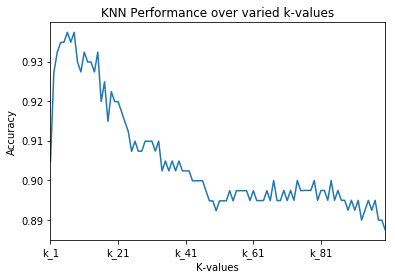

In [16]:
#Initialize a KNN classifier
knn_clf = neighbors.KNeighborsClassifier()

#Dictionary used to store accuracies of associated k-values. Maintains order 
k_results = OrderedDict()

#Stores the best score and the best k through the loop
best = 0
best_k = 0

#Initialize a KFold object for splitting data
kf = KFold(n_splits=10)

#Look through 100 k values
for k in range(100):
    
    #Store the resulting accuracies of each k
    results = np.array([])
    
    #Work your way through the indices of each fold using the KFold object
    for train_index, test_index in kf.split(train_data.loc[:,attributes], y=train_data['label']):
        #Initialize train and test attribute values by splitting data on provided indices
        X_train, X_test = train_data.loc[:,attributes].iloc[train_index], train_data.loc[:,attributes].iloc[test_index]
        #Initialize train and test label values by splitting data on provided indices
        y_train, y_test = train_data['label'].iloc[train_index], train_data['label'].iloc[test_index]
        
        #Set the number of neighbors in the algorithm to k+1 (starts at 0)
        knn_clf.set_params(n_neighbors=k+1)
        #Fit the KNN model using the training data
        knn_clf = knn_clf.fit(X_train, y_train)
        #Append the results using from the test data to the results array
        results = np.append(results, [knn_clf.score(X_test, y_test)])
        
    #Apply the accuracy of k accross all folds to the dictionary in-order
    k_results["k_"+str(k+1)] = np.average(results)
    
    #If the accuracy of this k was better than the best replace the best track it
    if np.average(results) > best :
        best = np.average(results)
        best_k = k
        
print("Best k: " + str(best_k))

#Re-initialize the knn using the best k
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)

#Plot the results
plot = pd.Series(k_results).plot.line(title='KNN Performance over varied k-values')
plot.set_xlabel("K-values")
plot.set_ylabel("Accuracy")
plot
#fig = plot.get_figure()
#fig.savefig("Q4_graph.pdf")


# B)

## Decision Tree

In [9]:
#Get the training score and predicted values using 10-fold cross validation
dt_train_score = cross_val_score(dt_clf, train_data.loc[:,attributes], train_data["label"], cv=10)
dt_train_pred = cross_val_predict(dt_clf, train_data.loc[:,attributes], train_data["label"], cv=10)

#Create a confusion matrix and print other performance metrics using computed values
dt_train_conf = confusion_matrix(train_data["label"], dt_train_pred)

print(np.mean(dt_train_score))
print(dt_train_conf)

              precision    recall  f1-score   support

           B       0.96      0.95      0.95       250
           M       0.91      0.93      0.92       149

   micro avg       0.94      0.94      0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399

0.942435897436
[[237  13]
 [ 10 139]]


## KNN

In [10]:
#Get the training score and predicted values using 10-fold cross validation
knn_train_score = cross_val_score(knn_clf, train_data.loc[:,attributes], train_data["label"], cv=10)
knn_train_pred = cross_val_predict(knn_clf, train_data.loc[:,attributes], train_data["label"], cv=10)

#Create a confusion matrix and print other performance metrics using computed values
knn_train_conf = confusion_matrix(train_data["label"], knn_train_pred)


print(np.mean(knn_train_score))
print(knn_train_conf)

              precision    recall  f1-score   support

           B       0.96      0.95      0.95       250
           M       0.91      0.93      0.92       149

   micro avg       0.94      0.94      0.94       399
   macro avg       0.94      0.94      0.94       399
weighted avg       0.94      0.94      0.94       399

0.932371794872
[[241   9]
 [ 18 131]]


# C)

## Decision Tree

In [11]:
#Get the training score and predicted values using 10-fold cross validation
dt_clf = dt_clf.fit(train_data.loc[:,attributes], train_data.label)
dt_test_pred = dt_clf.predict(test_data.loc[:,attributes])

#Create a confusion matrix and print other performance metrics using computed values
dt_test_conf = confusion_matrix(test_data["label"], dt_test_pred)

print(dt_test_conf)

              precision    recall  f1-score   support

           B       0.97      0.91      0.94       107
           M       0.86      0.95      0.90        63

   micro avg       0.92      0.92      0.92       170
   macro avg       0.91      0.93      0.92       170
weighted avg       0.93      0.92      0.92       170

[[97 10]
 [ 3 60]]


## KNN

In [12]:
#Get the training score and predicted values using 10-fold cross validation
knn_clf = knn_clf.fit(train_data.loc[:,attributes], train_data['label'])
knn_test_pred = knn_clf.predict(test_data.loc[:,attributes])

#Create a confusion matrix and print other performance metrics using computed values
knn_test_conf = confusion_matrix(test_data["label"], knn_test_pred)

print(knn_test_conf)

              precision    recall  f1-score   support

           B       0.93      0.94      0.94       107
           M       0.90      0.87      0.89        63

   micro avg       0.92      0.92      0.92       170
   macro avg       0.91      0.91      0.91       170
weighted avg       0.92      0.92      0.92       170

[[101   6]
 [  8  55]]
